In [1]:
import sys
sys.path.append('../')

In [2]:
import numpy as np
import itertools
import pandas as pd
import matplotlib.pyplot as plt

import networkx as nx
from networkx import edge_betweenness_centrality as betweenness
from networkx.algorithms.community.centrality import girvan_newman
from modularity_maximization import partition

from modularity_maximization.utils import get_modularity
from networkx.algorithms.community import greedy_modularity_communities
from cdlib import algorithms
import pickle

# import data
df = pd.read_csv('../dataset/edge_mean_th95.csv', index_col =0, dtype='int64')

/usr/local/var/pyenv/versions/torch_env/lib/python3.7/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [28]:
datalist = [edge_original_th95, edge_mean_th95, edge_mice_th95, edge_grape_th95]

Delete node with no neighborhood: [14, 18, 22, 23, 25, 27, 34, 38, 39, 43, 45, 47, 49, 51, 52, 53, 57, 58, 61, 62, 71, 73, 74, 75, 77, 79, 81, 84, 87, 92, 94, 97, 99, 101, 105, 106, 107, 108, 114, 115, 128, 132, 133, 136, 138, 140] 

Number of node: 96


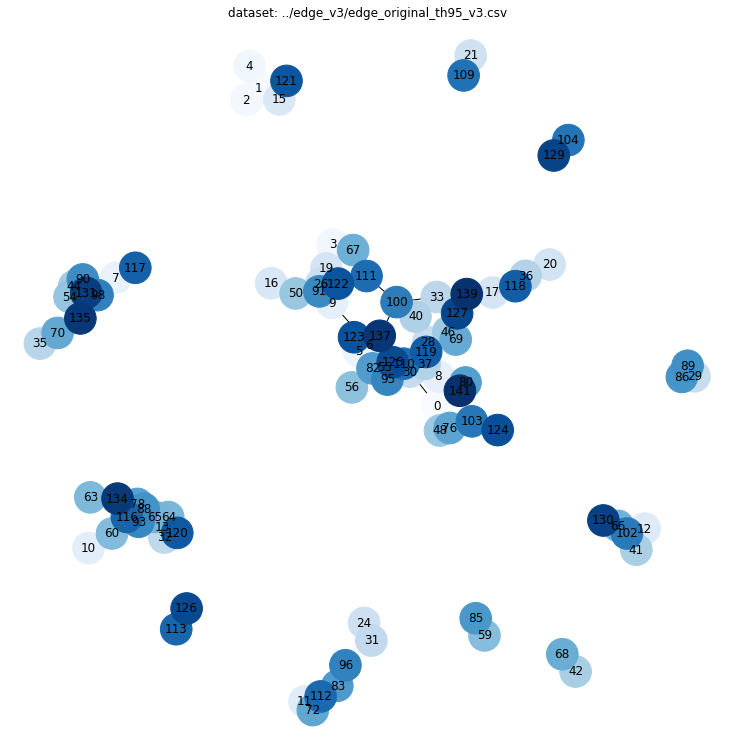

Delete node with no neighborhood: [12, 14, 15, 16, 17, 18, 21, 23, 24, 25, 27, 31, 35, 40, 41, 42, 44, 45, 47, 49, 51, 52, 53, 54, 57, 60, 61, 63, 64, 65, 68, 71, 72, 73, 74, 77, 79, 80, 81, 84, 87, 88, 92, 93, 98, 99, 101, 103, 104, 105, 107, 109, 113, 116, 117, 122, 124, 128, 131, 133, 138, 140] 

Number of node: 80


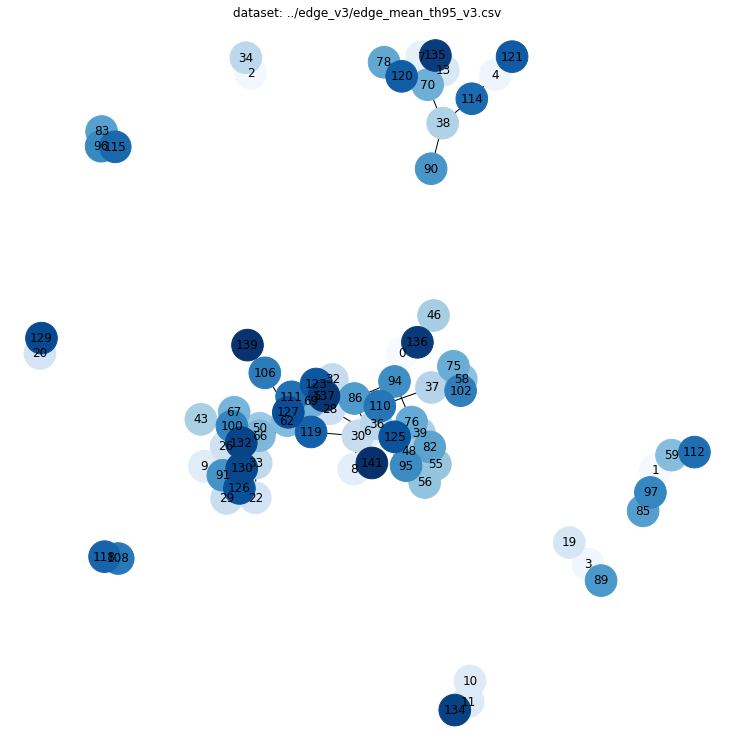

Delete node with no neighborhood: [0, 1, 2, 3, 4, 7, 8, 12, 13, 15, 16, 19, 20, 21, 22, 23, 25, 27, 30, 34, 35, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 77, 78, 79, 80, 81, 83, 84, 85, 87, 88, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 101, 102, 104, 105, 106, 109, 110, 112, 114, 115, 117, 119, 120, 121, 125, 126, 128, 129, 131, 133, 134, 135, 136, 138] 

Number of node: 37


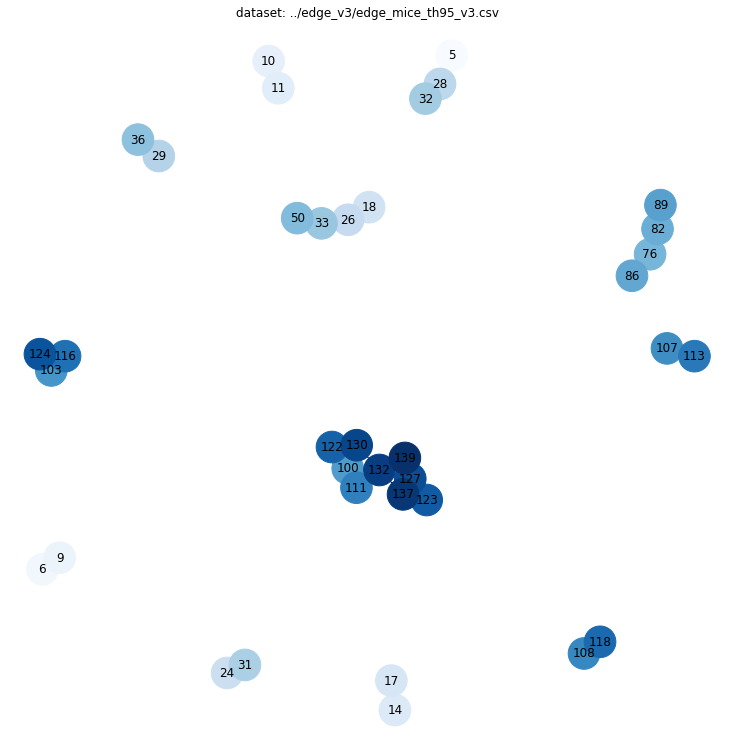

Delete node with no neighborhood: [0, 1, 2, 4, 5, 7, 12, 14, 15, 16, 17, 21, 23, 25, 27, 34, 35, 39, 40, 42, 43, 45, 47, 49, 51, 52, 53, 56, 57, 58, 59, 60, 61, 63, 64, 65, 67, 68, 69, 70, 72, 73, 74, 75, 77, 78, 79, 80, 81, 85, 87, 88, 89, 94, 97, 98, 99, 101, 102, 104, 105, 106, 109, 110, 112, 114, 120, 121, 124, 128, 129, 133, 135, 136, 138, 140] 

Number of node: 66


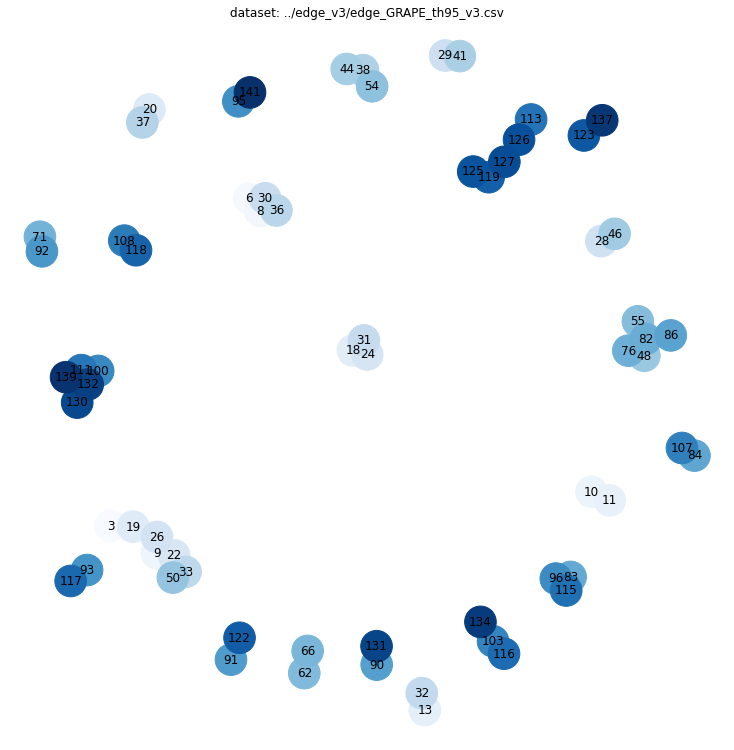

In [29]:
for dataset in datalist: 
    # import data
    df = pd.read_csv(dataset, index_col =0, dtype='int64')
    df = df.rename(columns={'0': 'dst', '1':'src'})

    # define edge_list (u,v)
    edge_list = list(df.itertuples(index=False, name=None))

    # define node_list
    node_list = [x for x in range(max(df['dst']))]

    # Create Graph 
    G = nx.Graph()

    # Add node and edge to graph
    G.add_nodes_from(node_list)
    G.add_edges_from(edge_list)

    # Delete node which does not have neighborhood
    print('Delete node with no neighborhood: {} \n'.format(list(nx.isolates(G))))
    G.remove_nodes_from(list(nx.isolates(G)))
    print('Number of node:',len(G.nodes))
    
    plt.figure(figsize=(10,10))
    pos = nx.spring_layout(G, scale=4)
    nx.draw(G, pos, node_color=range(len(G.nodes)), node_size=1000, with_labels=True, cmap=plt.cm.Blues)
    plt.title(f'dataset: {dataset}')
    plt.show()
#     plt.savefig('betweenness.jpg')

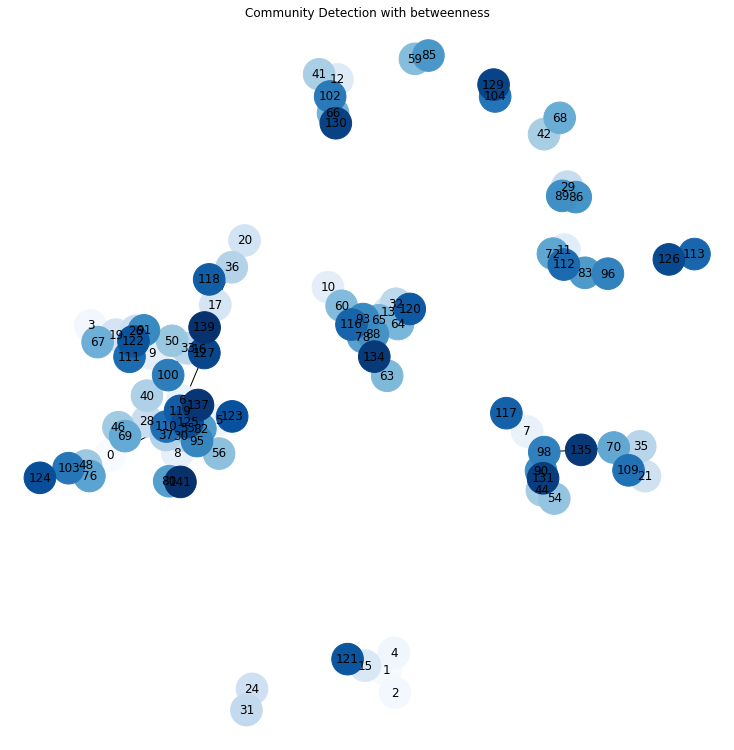

<Figure size 432x288 with 0 Axes>

In [22]:
plt.figure(figsize=(10,10))
pos = nx.spring_layout(G, scale=4)
nx.draw(G, pos, node_color=range(len(G.nodes)), node_size=1000, with_labels=True, cmap=plt.cm.Blues)
plt.title('Community Detection with betweenness')
plt.show()
plt.savefig('betweenness.jpg')

In [12]:
# criterion for most valuable edge (can be changed)
def most_central_edge(G):
    centrality = betweenness(G, weight="weight")
    # print(centrality)
    return max(centrality, key=centrality.get)

# Eigenvector 
Partition 자체가 Modularity Matrix에 대한 Eigenvector

# Modularity Maximization with Greedy Algorithm

In [ ]:
nx.info(G)

In [ ]:
# greedy_modularity_communities(G)

In [ ]:
greedy_module_comms = nx.algorithms.community.greedy_modularity_communities(G)

In [ ]:
greedy_dict = {}

for i, value in enumerate(greedy_module_comms):
    values = list(value)
    for v in values:
        greedy_dict[v] = i

In [ ]:
for comm in set(greedy_dict.values()):
    print("Community %d"%comm)
    print(comm)
    print(', '.join([str(node) for node in greedy_dict if greedy_dict[node] == comm]))

In [ ]:
print('Modularity of such partition for karate is %.3f' % get_modularity(G, greedy_dict))

# Performance Metric

* Betweenness > Girvan-Newman Algorithm

* Partition > Newman 
https://github.com/zhiyzuo/python-modularity-maximization/blob/master/modularity_maximization/community_newman.py
https://arxiv.org/abs/physics/0602124

* modularity_max greedy_modularity communities
Clauset-Newman-Moore greedy modularity maximization

In [92]:
edge_mean_th95 = '../edge_v3/edge_mean_th95_v3.csv' 
edge_mean_top5 = '../edge_v3/edge_mean_top5_v3.csv'
edge_mice_th95 = '../edge_v3/edge_mice_th95_v3.csv'
edge_mice_top5 = '../edge_v3/edge_mice_top5_v3.csv'
edge_grape_th95 = '../edge_v3/edge_GRAPE_th95_v3.csv'
edge_grape_top5 = '../edge_v3/edge_GRAPE_top5_v3.csv'
edge_original_th95 = '../edge_v3/edge_original_th95_v3.csv'
edge_original_top5 = '../edge_v3/edge_original_top5_v3.csv'

datalist = [edge_original_th95, edge_original_top5, edge_mean_th95, edge_mean_top5, edge_mice_th95, edge_mean_top5, edge_grape_th95, edge_grape_top5]

In [93]:
import random

In [94]:
# criterion for most valuable edge (can be changed)
def most_central_edge(G):
    centrality = betweenness(G, weight="weight")
    # print(centrality)
    return max(centrality, key=centrality.get)

def modularity_calculation(dataset):
    random.seed(185)
    print('='*50)
    dataset_name = dataset.split("/")[-1]
    print(f'[[Dataset: {dataset_name}]]')
    # import data
    df = pd.read_csv(dataset, index_col =0, dtype='int64')
    df = df.rename(columns={'0': 'dst', '1':'src'})

    # define edge_list (u,v)
    edge_list = list(df.itertuples(index=False, name=None))

    # define node_list
    node_list = [x for x in range(max(df['dst']))]

    # Create Graph 
    G = nx.Graph()

    # Add node and edge to graph
    G.add_nodes_from(node_list)
    G.add_edges_from(edge_list)
    
#     Delete node which does not have neighborhood
#     print('Delete node with no neighborhood: {} \n'.format(list(nx.isolates(G))))
    G.remove_nodes_from(list(nx.isolates(G)))
#     print('Number of node:',len(G.nodes))
    
    ### EigenVector
    
    print('{Partition > Eigenvector based clustering}')
    eigen_dict = partition(G)
    
    eigen_values = list(set(eigen_dict.values()))

    for key in eigen_dict.keys():
        if eigen_dict[key] in eigen_values:
            eigen_dict[key] = eigen_values.index(eigen_dict[key])
    
#     for comm in set(comm_dict.values()):
#         print("Community %d"%comm)
#         print(', '.join([str(node) for node in comm_dict if comm_dict[node] == comm]))
#     print(eigen_dict)
    print(f': Modularity of such partition for {dataset.split("/")[-1]} is \033[1m %.3f \033[0m' % get_modularity(G, eigen_dict))
    print()
    print('-'*20)
    print()
    
    ### Modularity(Greedy)
    
    print('{Modularity Maximization}')
    
    greedy_module_comms = nx.algorithms.community.greedy_modularity_communities(G)
    greedy_dict = {}

    for i, value in enumerate(greedy_module_comms):
        values = list(value)
        for v in values:
            greedy_dict[v] = i
#     print(greedy_dict)
    print(f': Modularity of such partition for {dataset.split("/")[-1]} is \033[1m %.3f \033[0m' % get_modularity(G, greedy_dict))
    print()
    print('-'*20)
    print()
    
    ### Betweenness

    print('{Betweenness}')
    
    communities = girvan_newman(G, most_valuable_edge=most_central_edge)

    node_groups = []
    for com in next(communities):
        node_groups.append(list(com))

    between_dict = {}
    for i, value in enumerate(node_groups):
        for v in value:
            between_dict[v] = i
#     print(between_dict)
    print(f': Modularity of such partition for {dataset.split("/")[-1]} is \033[1m %.3f \033[0m' % get_modularity(G, between_dict))
    print()
    print('-'*20)
    print()
    
    ### WalkTrap
    print('{Walk Trap}')
    
    walktrap = algorithms.walktrap(G)
    walk_comms=walktrap.communities
    walktrap_dict = {}

    for i, value in enumerate(walk_comms):
        values = list(value)
        for v in values:
            walktrap_dict[v] = i
#     print(walktrap_dict)      
    total_data = {'eigen': eigen_dict,
                  'greedy': greedy_dict,
                  'between': between_dict,
                  'walktrap': walktrap_dict} 
    
    print(f': Modularity of such partition for {dataset.split("/")[-1]} is \033[1m %.3f \033[0m' % get_modularity(G, walktrap_dict))
    with open(f'{dataset_name}.pickle', 'wb') as f:
        pickle.dump(total_data, f)
        
    return eigen_dict, greedy_dict, between_dict, walktrap_dict

In [ ]:
for data in datalist:
    modularity_calculation(data)

[[Dataset: edge_original_th95_v3.csv]]
{Partition > Eigenvector based clustering}
Calculating modularity for undirected graph
: Modularity of such partition for edge_original_th95_v3.csv is  0.783 

--------------------

{Modularity Maximization}
Calculating modularity for undirected graph
: Modularity of such partition for edge_original_th95_v3.csv is  0.783 

--------------------

{Betweenness}
Calculating modularity for undirected graph
: Modularity of such partition for edge_original_th95_v3.csv is  0.720 

--------------------

{Walk Trap}
Calculating modularity for undirected graph
: Modularity of such partition for edge_original_th95_v3.csv is  0.760 
[[Dataset: edge_original_top5_v3.csv]]
{Partition > Eigenvector based clustering}
Calculating modularity for undirected graph
: Modularity of such partition for edge_original_top5_v3.csv is  0.757 

--------------------

{Modularity Maximization}
Calculating modularity for undirected graph
: Modularity of such partition for edge_or

In [83]:
eigen_dict, greedy_dict, between_dict, walktrap_dict = modularity_calculation(datalist[0])

[[Dataset: edge_original_th95_v3.csv]]
{Partition > Eigenvector based clustering}
Calculating modularity for undirected graph
: Modularity of such partition for edge_original_th95_v3.csv is  0.783 

--------------------

{Modularity Maximization}
Calculating modularity for undirected graph
: Modularity of such partition for edge_original_th95_v3.csv is  0.783 

--------------------

{Betweenness}
Calculating modularity for undirected graph
: Modularity of such partition for edge_original_th95_v3.csv is  0.720 

--------------------

{Walk Trap}
Calculating modularity for undirected graph
: Modularity of such partition for edge_original_th95_v3.csv is  0.760 


In [84]:
comparison = [eigen_dict, greedy_dict, between_dict, walktrap_dict]

In [85]:
datalist

['../edge_v3/edge_original_th95_v3.csv',
 '../edge_v3/edge_mean_th95_v3.csv',
 '../edge_v3/edge_mice_th95_v3.csv',
 '../edge_v3/edge_GRAPE_th95_v3.csv']

In [86]:
for data in datalist:
    ed, gd, bd, wd = modularity_calculation(data)
    dict_list = [ed, gd, bd, wd]
    
    for compare, dictionary in zip(comparison, dict_list):
        accuracy = 0
        print(compare.values())
        print(dictionary.values())
        
        for key in list(dictionary.keys()):
            if int(compare[key]) == int(dictionary[key]):
                accuracy += 1 
                print(f'key: {key}')
                print(f'compare[key]: {compare[key]}, dictionary[key]: {dictionary[key]}')
                
        print(accuracy, len(dictionary.keys()))
        print(f'accuracy: {accuracy / len(dictionary.keys())}')

[[Dataset: edge_original_th95_v3.csv]]
{Partition > Eigenvector based clustering}
Calculating modularity for undirected graph
: Modularity of such partition for edge_original_th95_v3.csv is  0.783 

--------------------

{Modularity Maximization}
Calculating modularity for undirected graph
: Modularity of such partition for edge_original_th95_v3.csv is  0.783 

--------------------

{Betweenness}
Calculating modularity for undirected graph
: Modularity of such partition for edge_original_th95_v3.csv is  0.720 

--------------------

{Walk Trap}
Calculating modularity for undirected graph
: Modularity of such partition for edge_original_th95_v3.csv is  0.760 
dict_values([6, 7, 7, 2, 7, 0, 0, 5, 0, 2, 1, 8, 9, 1, 7, 2, 3, 2, 3, 13, 15, 2, 0, 4, 0, 15, 1, 3, 5, 3, 0, 3, 9, 11, 5, 0, 6, 2, 5, 0, 0, 10, 1, 1, 1, 1, 9, 2, 11, 0, 5, 8, 6, 1, 0, 0, 8, 10, 4, 1, 4, 5, 2, 1, 0, 8, 5, 3, 9, 6, 14, 13, 0, 2, 8, 12, 1, 5, 3, 0, 1, 7, 2, 0, 6, 0, 12, 3, 14, 9, 5, 1, 5, 0, 3, 0])
dict_values([4, 9, 

KeyError: 22